In [43]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [44]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [45]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
print("Información del dataset:")
print(wine_data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [47]:
print("Descripción estadística del dataset:")
print(wine_data.describe())


Descripción estadística del dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0

In [48]:
print("Valores nulos por columna:")
print(wine_data.isnull().sum())

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


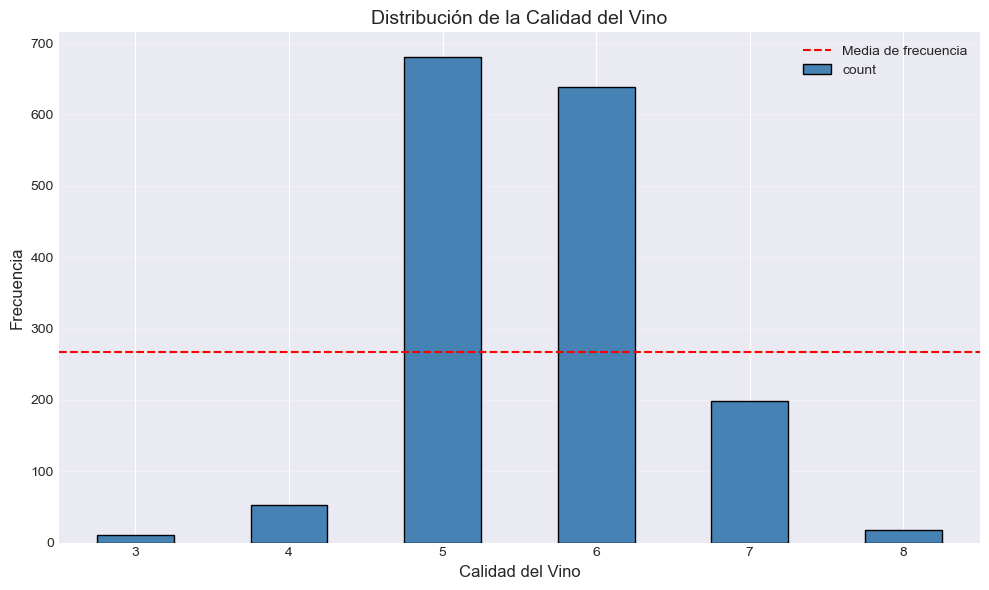

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [49]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

In [50]:
correlation_matrix = wine_data.corr()
print("\nMatriz de correlación:")
print(correlation_matrix.round(3))


Matriz de correlación:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000            -0.256        0.672   
volatile acidity             -0.256             1.000       -0.552   
citric acid                   0.672            -0.552        1.000   
residual sugar                0.115             0.002        0.144   
chlorides                     0.094             0.061        0.204   
free sulfur dioxide          -0.154            -0.011       -0.061   
total sulfur dioxide         -0.113             0.076        0.036   
density                       0.668             0.022        0.365   
pH                           -0.683             0.235       -0.542   
sulphates                     0.183            -0.261        0.313   
alcohol                      -0.062            -0.202        0.110   
quality                       0.124            -0.391        0.226   

                      residual sugar  chlorides  free sulfur diox

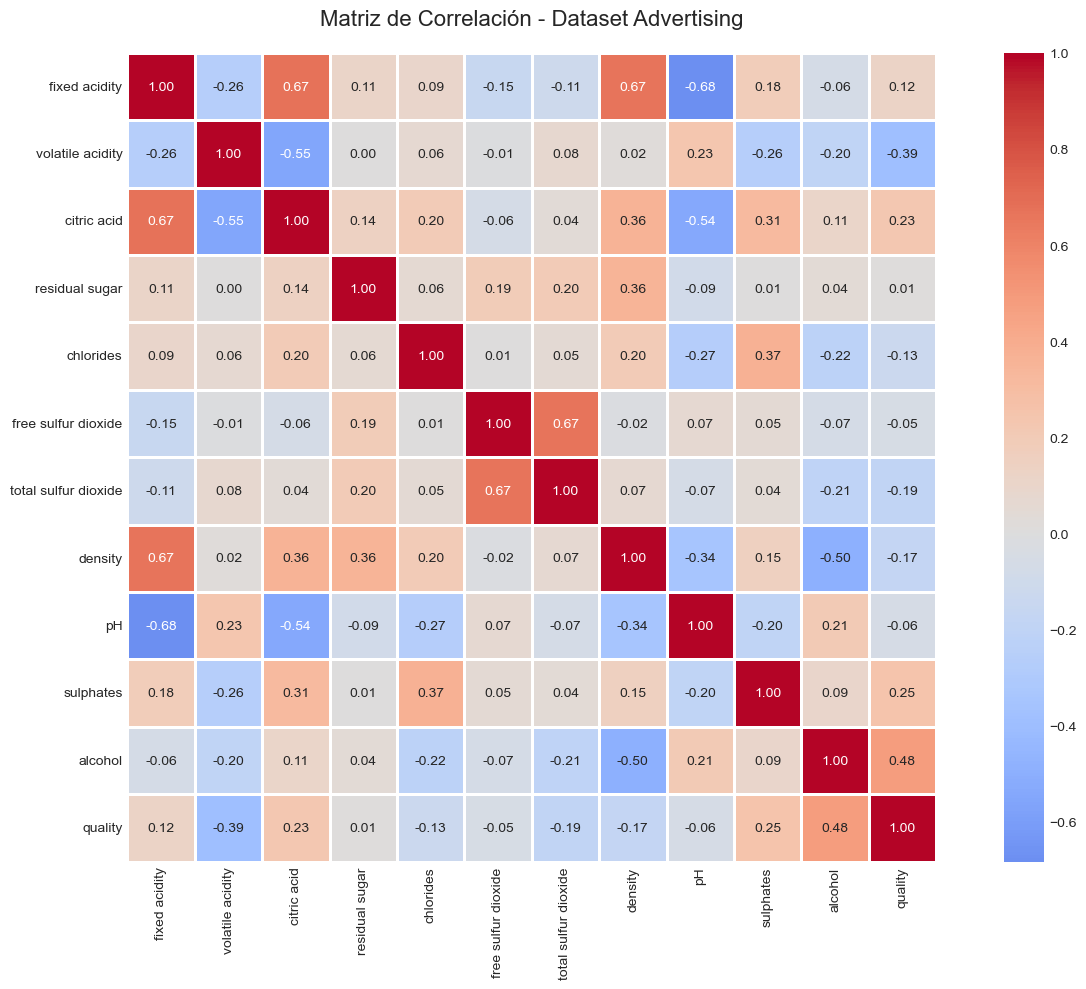

In [51]:
# Visualización de la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlación - Dataset Advertising', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

CORRELACIONES CON LA CALIDAD DEL VINO

Correlaciones ordenadas por magnitud absoluta:
--------------------------------------------------
alcohol                   |  0.476 | positiva | moderada
volatile acidity          | -0.391 | negativa | moderada
sulphates                 |  0.251 | positiva | débil
citric acid               |  0.226 | positiva | débil
total sulfur dioxide      | -0.185 | negativa | débil
density                   | -0.175 | negativa | débil
chlorides                 | -0.129 | negativa | débil
fixed acidity             |  0.124 | positiva | débil
pH                        | -0.058 | negativa | débil
free sulfur dioxide       | -0.051 | negativa | débil
residual sugar            |  0.014 | positiva | débil

RESUMEN DE LAS CORRELACIONES MÁS IMPORTANTES

Top 5 correlaciones más fuertes con quality:
---------------------------------------------
1. alcohol                   |  0.476
2. volatile acidity          | -0.391
3. sulphates                 |  0.251
4. citric a

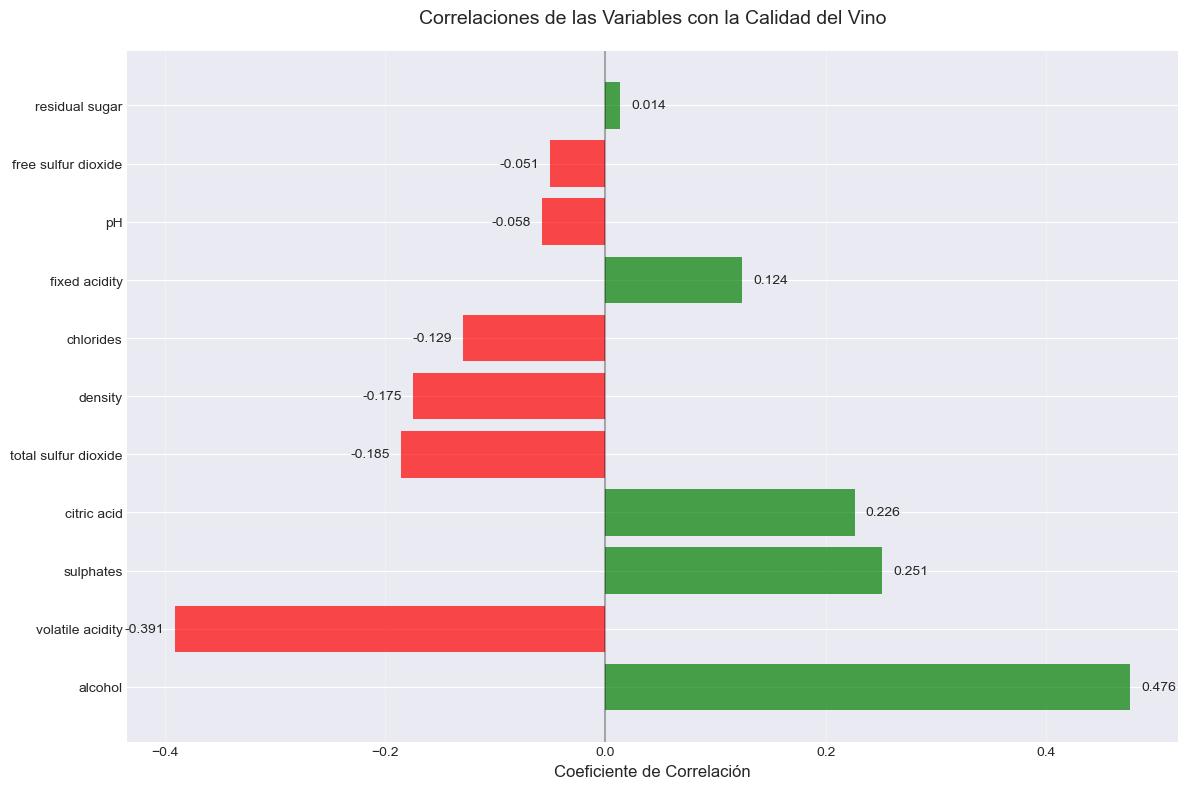


ANÁLISIS DETALLADO DE LAS CORRELACIONES MÁS IMPORTANTES

ALCOHOL:
  Correlación: 0.476
  Interpretación: A mayor alcohol, mayor calidad del vino
  Media: 10.423
  Desviación estándar: 1.066

VOLATILE ACIDITY:
  Correlación: -0.391
  Interpretación: A mayor volatile acidity, menor calidad del vino
  Media: 0.528
  Desviación estándar: 0.179

SULPHATES:
  Correlación: 0.251
  Interpretación: A mayor sulphates, mayor calidad del vino
  Media: 0.658
  Desviación estándar: 0.170

CITRIC ACID:
  Correlación: 0.226
  Interpretación: A mayor citric acid, mayor calidad del vino
  Media: 0.271
  Desviación estándar: 0.195

TOTAL SULFUR DIOXIDE:
  Correlación: -0.185
  Interpretación: A mayor total sulfur dioxide, menor calidad del vino
  Media: 46.468
  Desviación estándar: 32.895


In [52]:
# Análisis de correlaciones con la variable 'quality'
print("=" * 60)
print("CORRELACIONES CON LA CALIDAD DEL VINO")
print("=" * 60)

# Obtener correlaciones con quality (excluyendo quality consigo misma)
quality_correlations = correlation_matrix['quality'].drop('quality').sort_values(key=abs, ascending=False)

print("\nCorrelaciones ordenadas por magnitud absoluta:")
print("-" * 50)
for feature, corr in quality_correlations.items():
    direction = "positiva" if corr > 0 else "negativa"
    strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "débil"
    print(f"{feature:25} | {corr:6.3f} | {direction:8} | {strength}")

print("\n" + "=" * 60)
print("RESUMEN DE LAS CORRELACIONES MÁS IMPORTANTES")
print("=" * 60)

# Mostrar las 5 correlaciones más fuertes
top_correlations = quality_correlations.head(5)
print("\nTop 5 correlaciones más fuertes con quality:")
print("-" * 45)
for i, (feature, corr) in enumerate(top_correlations.items(), 1):
    print(f"{i}. {feature:25} | {corr:6.3f}")

# Visualización de las correlaciones con quality
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in quality_correlations.values]
bars = plt.barh(range(len(quality_correlations)), quality_correlations.values, color=colors, alpha=0.7)

plt.yticks(range(len(quality_correlations)), quality_correlations.index)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.title('Correlaciones de las Variables con la Calidad del Vino', fontsize=14, pad=20)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (bar, value) in enumerate(zip(bars, quality_correlations.values)):
    plt.text(value + (0.01 if value > 0 else -0.01), i, f'{value:.3f}', 
             va='center', ha='left' if value > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

# Análisis detallado de las correlaciones más importantes
print("\n" + "=" * 60)
print("ANÁLISIS DETALLADO DE LAS CORRELACIONES MÁS IMPORTANTES")
print("=" * 60)

for feature, corr in top_correlations.items():
    print(f"\n{feature.upper()}:")
    print(f"  Correlación: {corr:.3f}")
    if corr > 0:
        print(f"  Interpretación: A mayor {feature}, mayor calidad del vino")
    else:
        print(f"  Interpretación: A mayor {feature}, menor calidad del vino")
    
    # Calcular estadísticas básicas
    feature_mean = wine_data[feature].mean()
    feature_std = wine_data[feature].std()
    print(f"  Media: {feature_mean:.3f}")
    print(f"  Desviación estándar: {feature_std:.3f}")


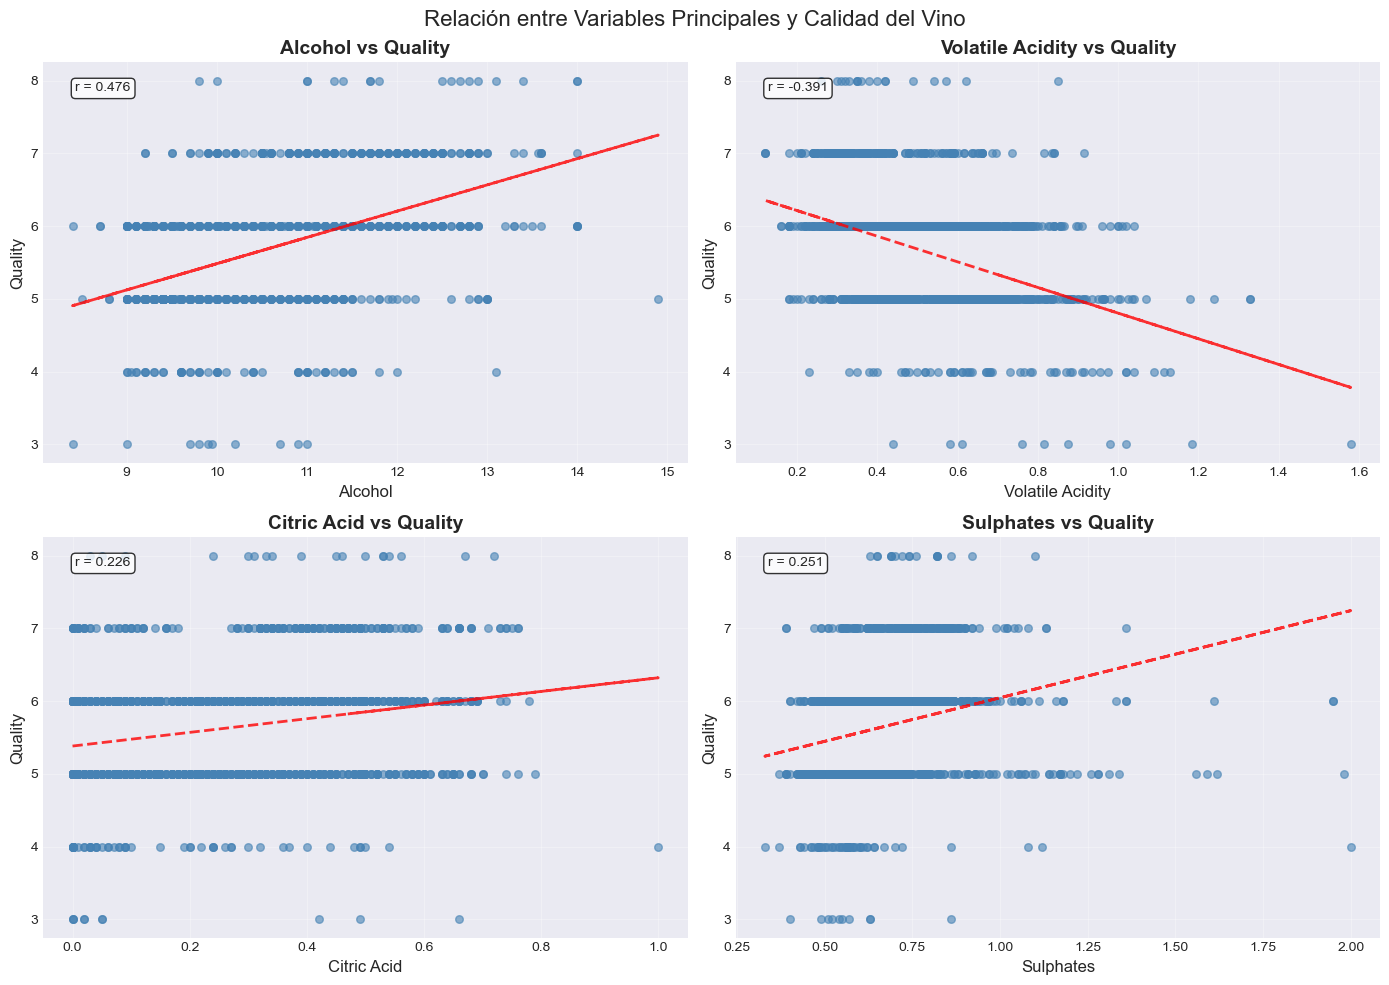

In [53]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

for idx, (ax, feature) in enumerate(zip(axes.flat, top_features)):
    # Crear scatter plot para cada variable vs quality
    ax.scatter(wine_data[feature], wine_data['quality'], alpha=0.6, s=30, color='steelblue')
    
    # Agregar línea de tendencia usando regresión lineal
    z = np.polyfit(wine_data[feature], wine_data['quality'], 1)
    p = np.poly1d(z)
    ax.plot(wine_data[feature], p(wine_data[feature]), "r--", alpha=0.8, linewidth=2)
    
    # Configurar el subplot
    ax.set_xlabel(feature.title(), fontsize=12)
    ax.set_ylabel('Quality', fontsize=12)
    ax.set_title(f'{feature.title()} vs Quality', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Calcular y mostrar el coeficiente de correlación
    corr = wine_data[feature].corr(wine_data['quality'])
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
            fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

In [54]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [55]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("División de datos completada:")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

División de datos completada:
Tamaño del conjunto de entrenamiento: 1279 muestras (80.0%)
Tamaño del conjunto de prueba: 320 muestras (20.0%)


In [56]:
# Estandarización de características para Ridge y Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos estandarizados para Ridge y Lasso")
print(f"Media de X_train_scaled: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_train_scaled.std(axis=0).round(2)}")

Datos estandarizados para Ridge y Lasso
Media de X_train_scaled: [-0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0.]
Desviación estándar de X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

ridge_df = pd.DataFrame(cv_results_manual)
# Seleccionar el mejor alpha basado en RMSE de prueba
best_alpha_ridge = ridge_df.loc[ridge_df['mean_rmse'].idxmin(), 'alpha']
print(f"\nMejor alpha para Ridge: {best_alpha_ridge}")

Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)

Mejor alpha para Ridge: 100.0


In [58]:
# RidgeCV para encontrar automáticamente el mejor alpha
alphas = np.logspace(-3, 3, 100)  # 100 valores entre 0.001 y 1000
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha encontrado por RidgeCV: {ridge_cv.alpha_}")

Mejor alpha encontrado por RidgeCV: 81.11308307896873


In [59]:
# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': alphas
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# GridSearchCV con validación cruzada
grid_search_ridge = GridSearchCV(
    estimator=ridge_base,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Entrenamiento
grid_search_ridge.fit(X_train, y_train)

# Resultados
best_alpha = grid_search_ridge.best_params_['alpha']
best_score = np.sqrt(-grid_search_ridge.best_score_)  # pasamos a RMSE

print(f"Mejor alpha: {best_alpha}")
print(f"Mejor score (RMSE en CV): {best_score:.4f}")

# Evaluación en test con el mejor modelo
y_pred = grid_search_ridge.best_estimator_.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en test: {rmse_test:.4f}")

Mejor alpha: 0.4641588833612782
Mejor score (RMSE en CV): 0.6627
RMSE en test: 0.6259


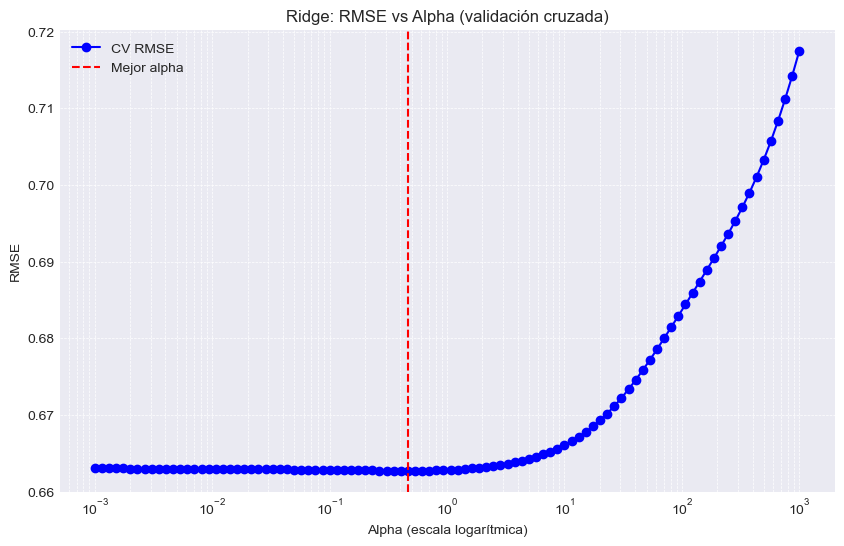

In [60]:
# Extraer resultados de la validación cruzada
alphas = grid_search_ridge.cv_results_['param_alpha'].data.astype(float)
mean_test_score = grid_search_ridge.cv_results_['mean_test_score']

# Convertir a RMSE (recuerda: los scores son negativos)
rmse_scores = np.sqrt(-mean_test_score)

# Visualización
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, rmse_scores, marker='o', linestyle='-', color='b', label="CV RMSE")
plt.axvline(grid_search_ridge.best_params_['alpha'], color='r', linestyle='--', label="Mejor alpha")
plt.xlabel("Alpha (escala logarítmica)")
plt.ylabel("RMSE")
plt.title("Ridge: RMSE vs Alpha (validación cruzada)")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [61]:
#OLS
# Entrenar modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Métricas
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr_train = np.sqrt(mse_lr_train)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)


print("="*50)
print("REGRESIÓN LINEAL NORMAL (OLS)")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {lr_model.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lr_train:.4f}")
print(f"  R²: {r2_lr_train:.4f}")
print(f"  MAE: {mae_lr_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lr_test:.4f}")
print(f"  R²: {r2_lr_test:.4f}")
print(f"  MAE: {mae_lr_test:.4f}")

REGRESIÓN LINEAL NORMAL (OLS)

Coeficientes:
  fixed acidity: 0.023085
  volatile acidity: -1.001304
  citric acid: -0.140821
  residual sugar: 0.006564
  chlorides: -1.806503
  free sulfur dioxide: 0.005627
  total sulfur dioxide: -0.003644
  density: -10.351594
  pH: -0.393688
  sulphates: 0.841172
  alcohol: 0.281890

Intercepto: 14.355105

Métricas en Entrenamiento:
  RMSE: 0.6513
  R²: 0.3480
  MAE: 0.4996

Métricas en Prueba:
  RMSE: 0.6245
  R²: 0.4032
  MAE: 0.5035


In [62]:
# Entrenar modelo final con mejor alpha
ridge_model_best = Ridge(alpha=best_alpha, random_state=42)
ridge_model_best.fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge_train = ridge_model_best.predict(X_train_scaled)
y_pred_ridge_test = ridge_model_best.predict(X_test_scaled)

# Métricas
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
rmse_ridge_train = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)

print("\n" + "="*50)
print(f"REGRESIÓN RIDGE (alpha={best_alpha_ridge})")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, ridge_model_best.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {ridge_model_best.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_ridge_train:.4f}")
print(f"  R²: {r2_ridge_train:.4f}")
print(f"  MAE: {mae_ridge_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_ridge_test:.4f}")
print(f"  R²: {r2_ridge_test:.4f}")
print(f"  MAE: {mae_ridge_test:.4f}")


REGRESIÓN RIDGE (alpha=100.0)

Coeficientes:
  fixed acidity: 0.039998
  volatile acidity: -0.179350
  citric acid: -0.027377
  residual sugar: 0.009506
  chlorides: -0.089057
  free sulfur dioxide: 0.057933
  total sulfur dioxide: -0.119936
  density: -0.019487
  pH: -0.060410
  sulphates: 0.146802
  alcohol: 0.296370

Intercepto: 5.623925

Métricas en Entrenamiento:
  RMSE: 0.6513
  R²: 0.3480
  MAE: 0.4996

Métricas en Prueba:
  RMSE: 0.6245
  R²: 0.4032
  MAE: 0.5035


In [63]:
# Seleccionar el mejor alpha
alphas_lasso = np.logspace(-3, 1, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.alpha_

# Entrenar modelo final con mejor alpha
lasso_model_best = Lasso(alpha=best_alpha_lasso, random_state=42, max_iter=10000)
lasso_model_best.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lasso_train = lasso_model_best.predict(X_train_scaled)
y_pred_lasso_test = lasso_model_best.predict(X_test_scaled)

# Métricas
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso_train = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

print("\n" + "="*50)
print(f"REGRESIÓN LASSO (alpha={best_alpha_lasso})")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lasso_model_best.coef_):
    if coef != 0:
        print(f"  {feature}: {coef:.6f}")
    else:
        print(f"  {feature}: {coef:.6f} (eliminado)")
print(f"\nIntercepto: {lasso_model_best.intercept_:.6f}")
print(f"\nCaracterísticas seleccionadas: {np.sum(lasso_model_best.coef_ != 0)} de {len(X.columns)}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lasso_train:.4f}")
print(f"  R²: {r2_lasso_train:.4f}")
print(f"  MAE: {mae_lasso_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lasso_test:.4f}")
print(f"  R²: {r2_lasso_test:.4f}")
print(f"  MAE: {mae_lasso_test:.4f}")


REGRESIÓN LASSO (alpha=0.008497534359086447)

Coeficientes:
  fixed acidity: 0.009743
  volatile acidity: -0.171165
  citric acid: -0.000000 (eliminado)
  residual sugar: 0.000000 (eliminado)
  chlorides: -0.080162
  free sulfur dioxide: 0.035793
  total sulfur dioxide: -0.100195
  density: -0.000000 (eliminado)
  pH: -0.051761
  sulphates: 0.133200
  alcohol: 0.298733

Intercepto: 5.623925

Características seleccionadas: 8 de 11

Métricas en Entrenamiento:
  RMSE: 0.6522
  R²: 0.3462
  MAE: 0.5015

Métricas en Prueba:
  RMSE: 0.6266
  R²: 0.3991
  MAE: 0.5071


In [66]:
# Crear tabla comparativa
comparison_data = {
    'Modelo': ['Linear Regression', f'Ridge (α={best_alpha})', f'Lasso (α={best_alpha_lasso})'],
    'RMSE Train': [rmse_lr_train, rmse_ridge_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_ridge_test, rmse_lasso_test],
    'R² Train': [r2_lr_train, r2_ridge_train, r2_lasso_train],
    'R² Test': [r2_lr_test, r2_ridge_test, r2_lasso_test],
    'MAE Test': [mae_lr_test, mae_ridge_test, mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS")
print("="*70)
print(comparison_df.to_string(index=False))

# Identificar el mejor modelo
best_model_idx = comparison_df['RMSE Test'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Modelo']
print(f"\n🏆 Mejor modelo basado en RMSE de prueba: {best_model_name}")


COMPARACIÓN DE MODELOS
                        Modelo  RMSE Train  RMSE Test  R² Train  R² Test  MAE Test
             Linear Regression      0.6513     0.6245    0.3480   0.4032    0.5035
  Ridge (α=0.4641588833612782)      0.6513     0.6245    0.3480   0.4032    0.5035
Lasso (α=0.008497534359086447)      0.6522     0.6266    0.3462   0.3991    0.5071

🏆 Mejor modelo basado en RMSE de prueba: Linear Regression


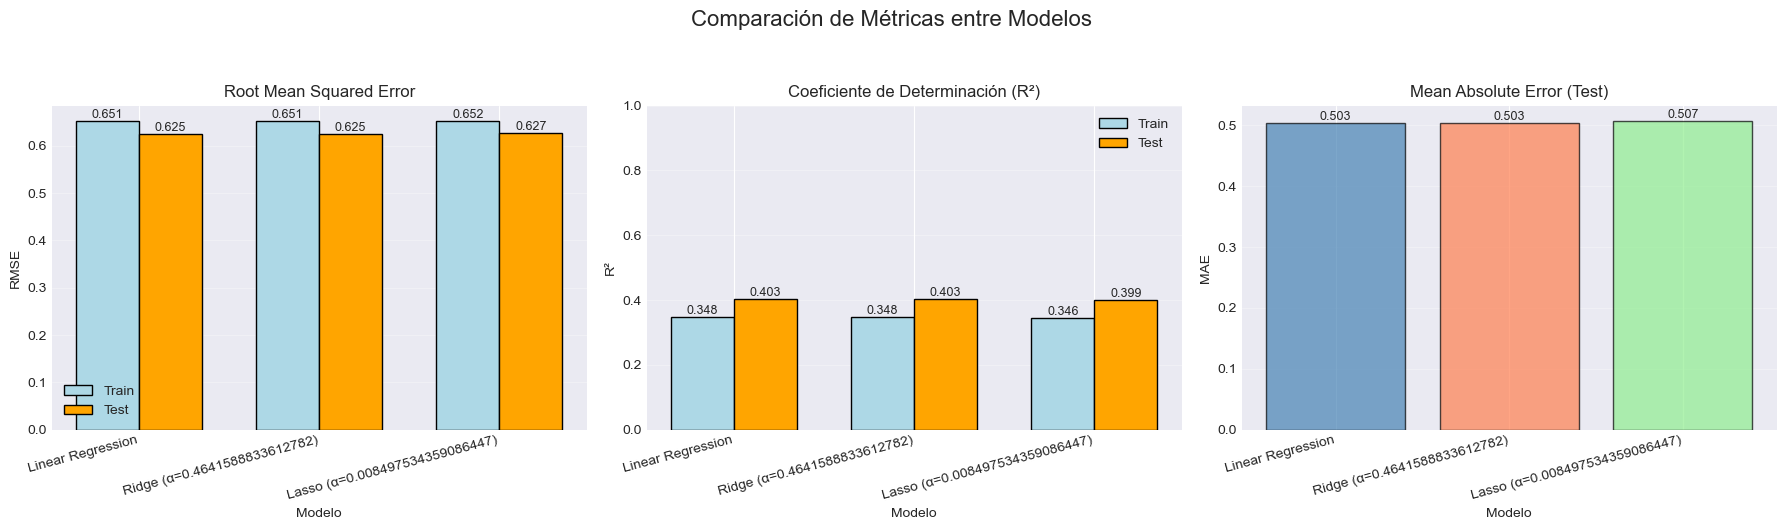

In [67]:
# Visualización de métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparación de Métricas entre Modelos', fontsize=16, y=1.05)

models = comparison_df['Modelo'].tolist()
x_pos = np.arange(len(models))
colors = ['steelblue', 'coral', 'lightgreen']

# RMSE
ax1 = axes[0]
width = 0.35
bars1 = ax1.bar(x_pos - width/2, comparison_df['RMSE Train'], width, label='Train', color='lightblue', edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, comparison_df['RMSE Test'], width, label='Test', color='orange', edgecolor='black')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('RMSE')
ax1.set_title('Root Mean Squared Error')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# R²
ax2 = axes[1]
bars3 = ax2.bar(x_pos - width/2, comparison_df['R² Train'], width, label='Train', color='lightblue', edgecolor='black')
bars4 = ax2.bar(x_pos + width/2, comparison_df['R² Test'], width, label='Test', color='orange', edgecolor='black')
ax2.set_xlabel('Modelo')
ax2.set_ylabel('R²')
ax2.set_title('Coeficiente de Determinación (R²)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, rotation=15, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([0, 1])

# MAE
ax3 = axes[2]
bars5 = ax3.bar(x_pos, comparison_df['MAE Test'], color=colors, edgecolor='black', alpha=0.7)
ax3.set_xlabel('Modelo')
ax3.set_ylabel('MAE')
ax3.set_title('Mean Absolute Error (Test)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(models, rotation=15, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bars in [bars1, bars2, bars3, bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        if bars in [bars3, bars4]:  # Para R²
            ax = ax2
        elif bars in [bars1, bars2]:  # Para RMSE
            ax = ax1
        else:  # Para MAE
            ax = ax3
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

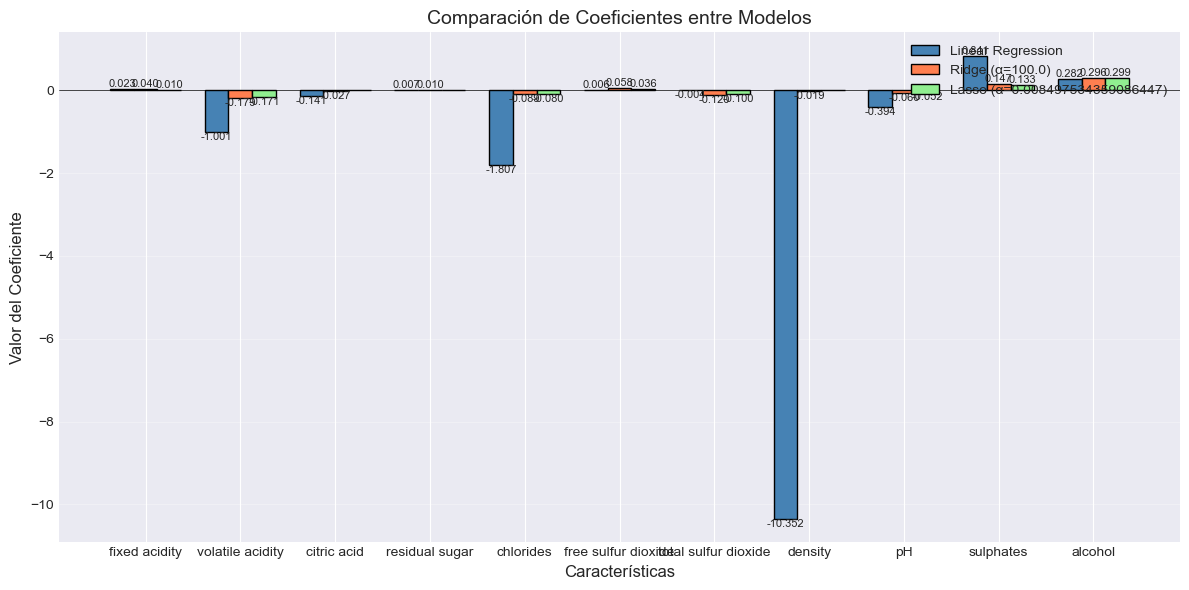

In [68]:
# Visualización de coeficientes
fig, ax = plt.subplots(figsize=(12, 6))

features = X.columns.tolist()
x_pos = np.arange(len(features))
width = 0.25

# Coeficientes de cada modelo
coef_lr = lr_model.coef_
coef_ridge = ridge_model_best.coef_
coef_lasso = lasso_model_best.coef_

bars1 = ax.bar(x_pos - width, coef_lr, width, label='Linear Regression', color='steelblue', edgecolor='black')
bars2 = ax.bar(x_pos, coef_ridge, width, label=f'Ridge (α={best_alpha_ridge})', color='coral', edgecolor='black')
bars3 = ax.bar(x_pos + width, coef_lasso, width, label=f'Lasso (α={best_alpha_lasso})', color='lightgreen', edgecolor='black')

ax.set_xlabel('Características', fontsize=12)
ax.set_ylabel('Valor del Coeficiente', fontsize=12)
ax.set_title('Comparación de Coeficientes entre Modelos', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Agregar valores en las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.001:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)

plt.tight_layout()
plt.show()

COMPARACIÓN DE COEFICIENTES ENTRE MODELOS


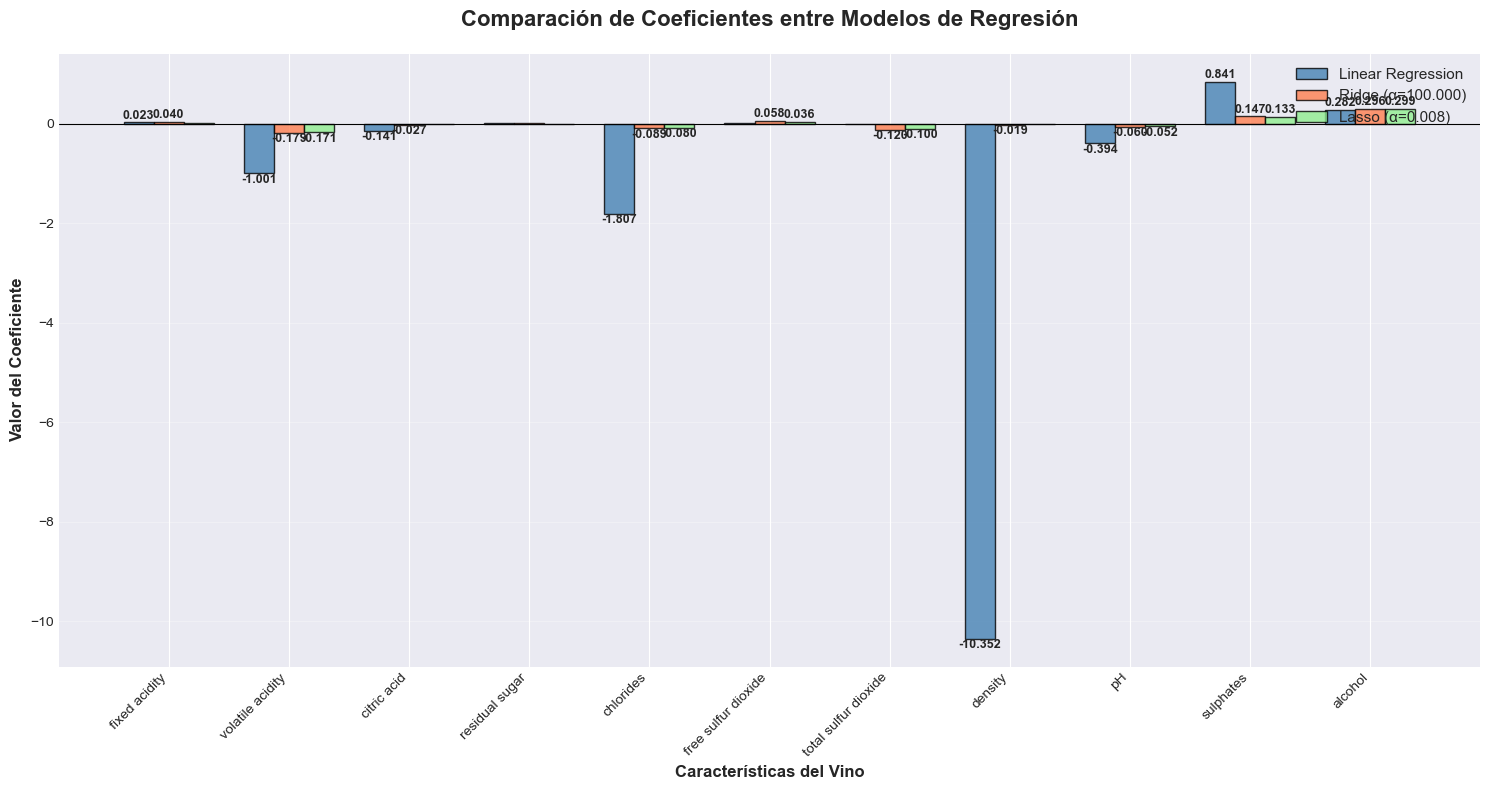


ANÁLISIS COMPARATIVO DE COEFICIENTES
Comparación de coeficientes:
             Feature  Linear_Regression   Ridge   Lasso  Ridge_vs_LR  Lasso_vs_LR  Lasso_vs_Ridge
       fixed acidity             0.0231  0.0400  0.0097       0.0169      -0.0133         -0.0303
    volatile acidity            -1.0013 -0.1793 -0.1712       0.8220       0.8301          0.0082
         citric acid            -0.1408 -0.0274 -0.0000       0.1134       0.1408          0.0274
      residual sugar             0.0066  0.0095  0.0000       0.0029      -0.0066         -0.0095
           chlorides            -1.8065 -0.0891 -0.0802       1.7174       1.7263          0.0089
 free sulfur dioxide             0.0056  0.0579  0.0358       0.0523       0.0302         -0.0221
total sulfur dioxide            -0.0036 -0.1199 -0.1002      -0.1163      -0.0966          0.0197
             density           -10.3516 -0.0195 -0.0000      10.3321      10.3516          0.0195
                  pH            -0.3937 -0.0604 -0.

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# Visualización de coeficientes - AJUSTADO PARA EL CONTEXTO ACTUAL
print("=" * 60)
print("COMPARACIÓN DE COEFICIENTES ENTRE MODELOS")
print("=" * 60)

# Obtener las características del dataset de vinos
features = X_train.columns.tolist()
x_pos = np.arange(len(features))
width = 0.25

# Coeficientes de cada modelo (usando las variables definidas en el notebook)
coef_lr = lr_model.coef_  # Modelo de regresión lineal
coef_ridge = ridge_model_best.coef_  # Modelo Ridge final
coef_lasso = lasso_model_best.coef_  # Modelo Lasso final

# Crear la visualización
fig, ax = plt.subplots(figsize=(15, 8))

bars1 = ax.bar(x_pos - width, coef_lr, width, label='Linear Regression', color='steelblue', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x_pos, coef_ridge, width, label=f'Ridge (α={best_alpha_ridge:.3f})', color='coral', edgecolor='black', alpha=0.8)
bars3 = ax.bar(x_pos + width, coef_lasso, width, label=f'Lasso (α={best_alpha_lasso:.3f})', color='lightgreen', edgecolor='black', alpha=0.8)

ax.set_xlabel('Características del Vino', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor del Coeficiente', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Coeficientes entre Modelos de Regresión', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Agregar valores en las barras (solo si son significativos)
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.01:  # Solo mostrar valores > 0.01
            ax.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.01),
                    f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', 
                    fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis comparativo de los coeficientes
print(f"\n{'='*60}")
print("ANÁLISIS COMPARATIVO DE COEFICIENTES")
print(f"{'='*60}")

# Crear DataFrame comparativo
coef_comparison = pd.DataFrame({
    'Feature': features,
    'Linear_Regression': coef_lr,
    'Ridge': coef_ridge,
    'Lasso': coef_lasso
})

# Calcular diferencias
coef_comparison['Ridge_vs_LR'] = coef_comparison['Ridge'] - coef_comparison['Linear_Regression']
coef_comparison['Lasso_vs_LR'] = coef_comparison['Lasso'] - coef_comparison['Linear_Regression']
coef_comparison['Lasso_vs_Ridge'] = coef_comparison['Lasso'] - coef_comparison['Ridge']

print("Comparación de coeficientes:")
print(coef_comparison.round(4).to_string(index=False))

# Análisis de regularización
print(f"\n{'='*60}")
print("ANÁLISIS DE REGULARIZACIÓN")
print(f"{'='*60}")

# Contar características seleccionadas por Lasso
lasso_selected = np.sum(coef_lasso != 0)
total_features = len(features)

print(f"Características seleccionadas por Lasso: {lasso_selected} de {total_features}")
print(f"Porcentaje de características seleccionadas: {(lasso_selected/total_features)*100:.1f}%")

# Calcular la magnitud promedio de los coeficientes
avg_magnitude_lr = np.mean(np.abs(coef_lr))
avg_magnitude_ridge = np.mean(np.abs(coef_ridge))
avg_magnitude_lasso = np.mean(np.abs(coef_lasso[coef_lasso != 0])) if lasso_selected > 0 else 0

print(f"\nMagnitud promedio de coeficientes:")
print(f"Linear Regression: {avg_magnitude_lr:.4f}")
print(f"Ridge: {avg_magnitude_ridge:.4f}")
print(f"Lasso (solo seleccionados): {avg_magnitude_lasso:.4f}")

# Identificar las características más importantes según cada modelo
print(f"\n{'='*60}")
print("CARACTERÍSTICAS MÁS IMPORTANTES POR MODELO")
print(f"{'='*60}")

# Linear Regression - top 5
lr_importance = pd.DataFrame({
    'Feature': features,
    'Abs_Coefficient': np.abs(coef_lr)
}).sort_values('Abs_Coefficient', ascending=False).head(5)

print("Top 5 - Linear Regression:")
print(lr_importance.to_string(index=False))

# Ridge - top 5
ridge_importance = pd.DataFrame({
    'Feature': features,
    'Abs_Coefficient': np.abs(coef_ridge)
}).sort_values('Abs_Coefficient', ascending=False).head(5)

print(f"\nTop 5 - Ridge:")
print(ridge_importance.to_string(index=False))

# Lasso - características seleccionadas
lasso_importance = pd.DataFrame({
    'Feature': features[coef_lasso != 0],
    'Coefficient': coef_lasso[coef_lasso != 0],
    'Abs_Coefficient': np.abs(coef_lasso[coef_lasso != 0])
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nCaracterísticas seleccionadas por Lasso:")
print(lasso_importance.to_string(index=False))
